In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Importing Libreries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
print("Train Size", train_df.shape)
print("Test Size", test_df.shape)

Train Size (1460, 81)
Test Size (1459, 80)


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print("~~~~~Train DF~~~~~\n")
print(train_df.info())
print("\n\n\n")
print("~~~~~Test DF~~~~~\n", )
print(test_df.info())

~~~~~Train DF~~~~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [9]:
null_cols = train_df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
null_cols[null_cols > train_df.shape[0] * 30 / 100]

Alley          1369
MasVnrType      872
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [11]:
# cols to remove
threshold = train_df.shape[0] * 30 / 100  

COLS_TO_REMOVE = null_cols[null_cols > threshold].index.tolist()
COLS_TO_REMOVE 

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
train_df = train_df.drop(columns=COLS_TO_REMOVE, axis=1)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
test_df = test_df.drop(columns=COLS_TO_REMOVE, axis=1)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [14]:
null_cols = train_df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
null_cols = test_df.isnull().sum()
null_cols[null_cols > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [16]:
TARGET = train_df['SalePrice']
CAT_COLS = train_df.select_dtypes(include="object").columns.tolist()
NUM_COLS = train_df.select_dtypes(include="number").columns.tolist()

In [17]:
for col in CAT_COLS:
    print(
        f"{col} \n **train df** -> {train_df[col].value_counts()} \n\n **test df** -> {test_df[col].value_counts()} \n\n\n\n"
    )

MSZoning 
 **train df** -> MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

 **test df** -> MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64 




Street 
 **train df** -> Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

 **test df** -> Street
Pave    1453
Grvl       6
Name: count, dtype: int64 




LotShape 
 **train df** -> LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

 **test df** -> LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: count, dtype: int64 




LandContour 
 **train df** -> LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64 

 **test df** -> LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: count, dtype: int64 




Utilities 
 **train df** -> Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

 **test df** -> Utilities

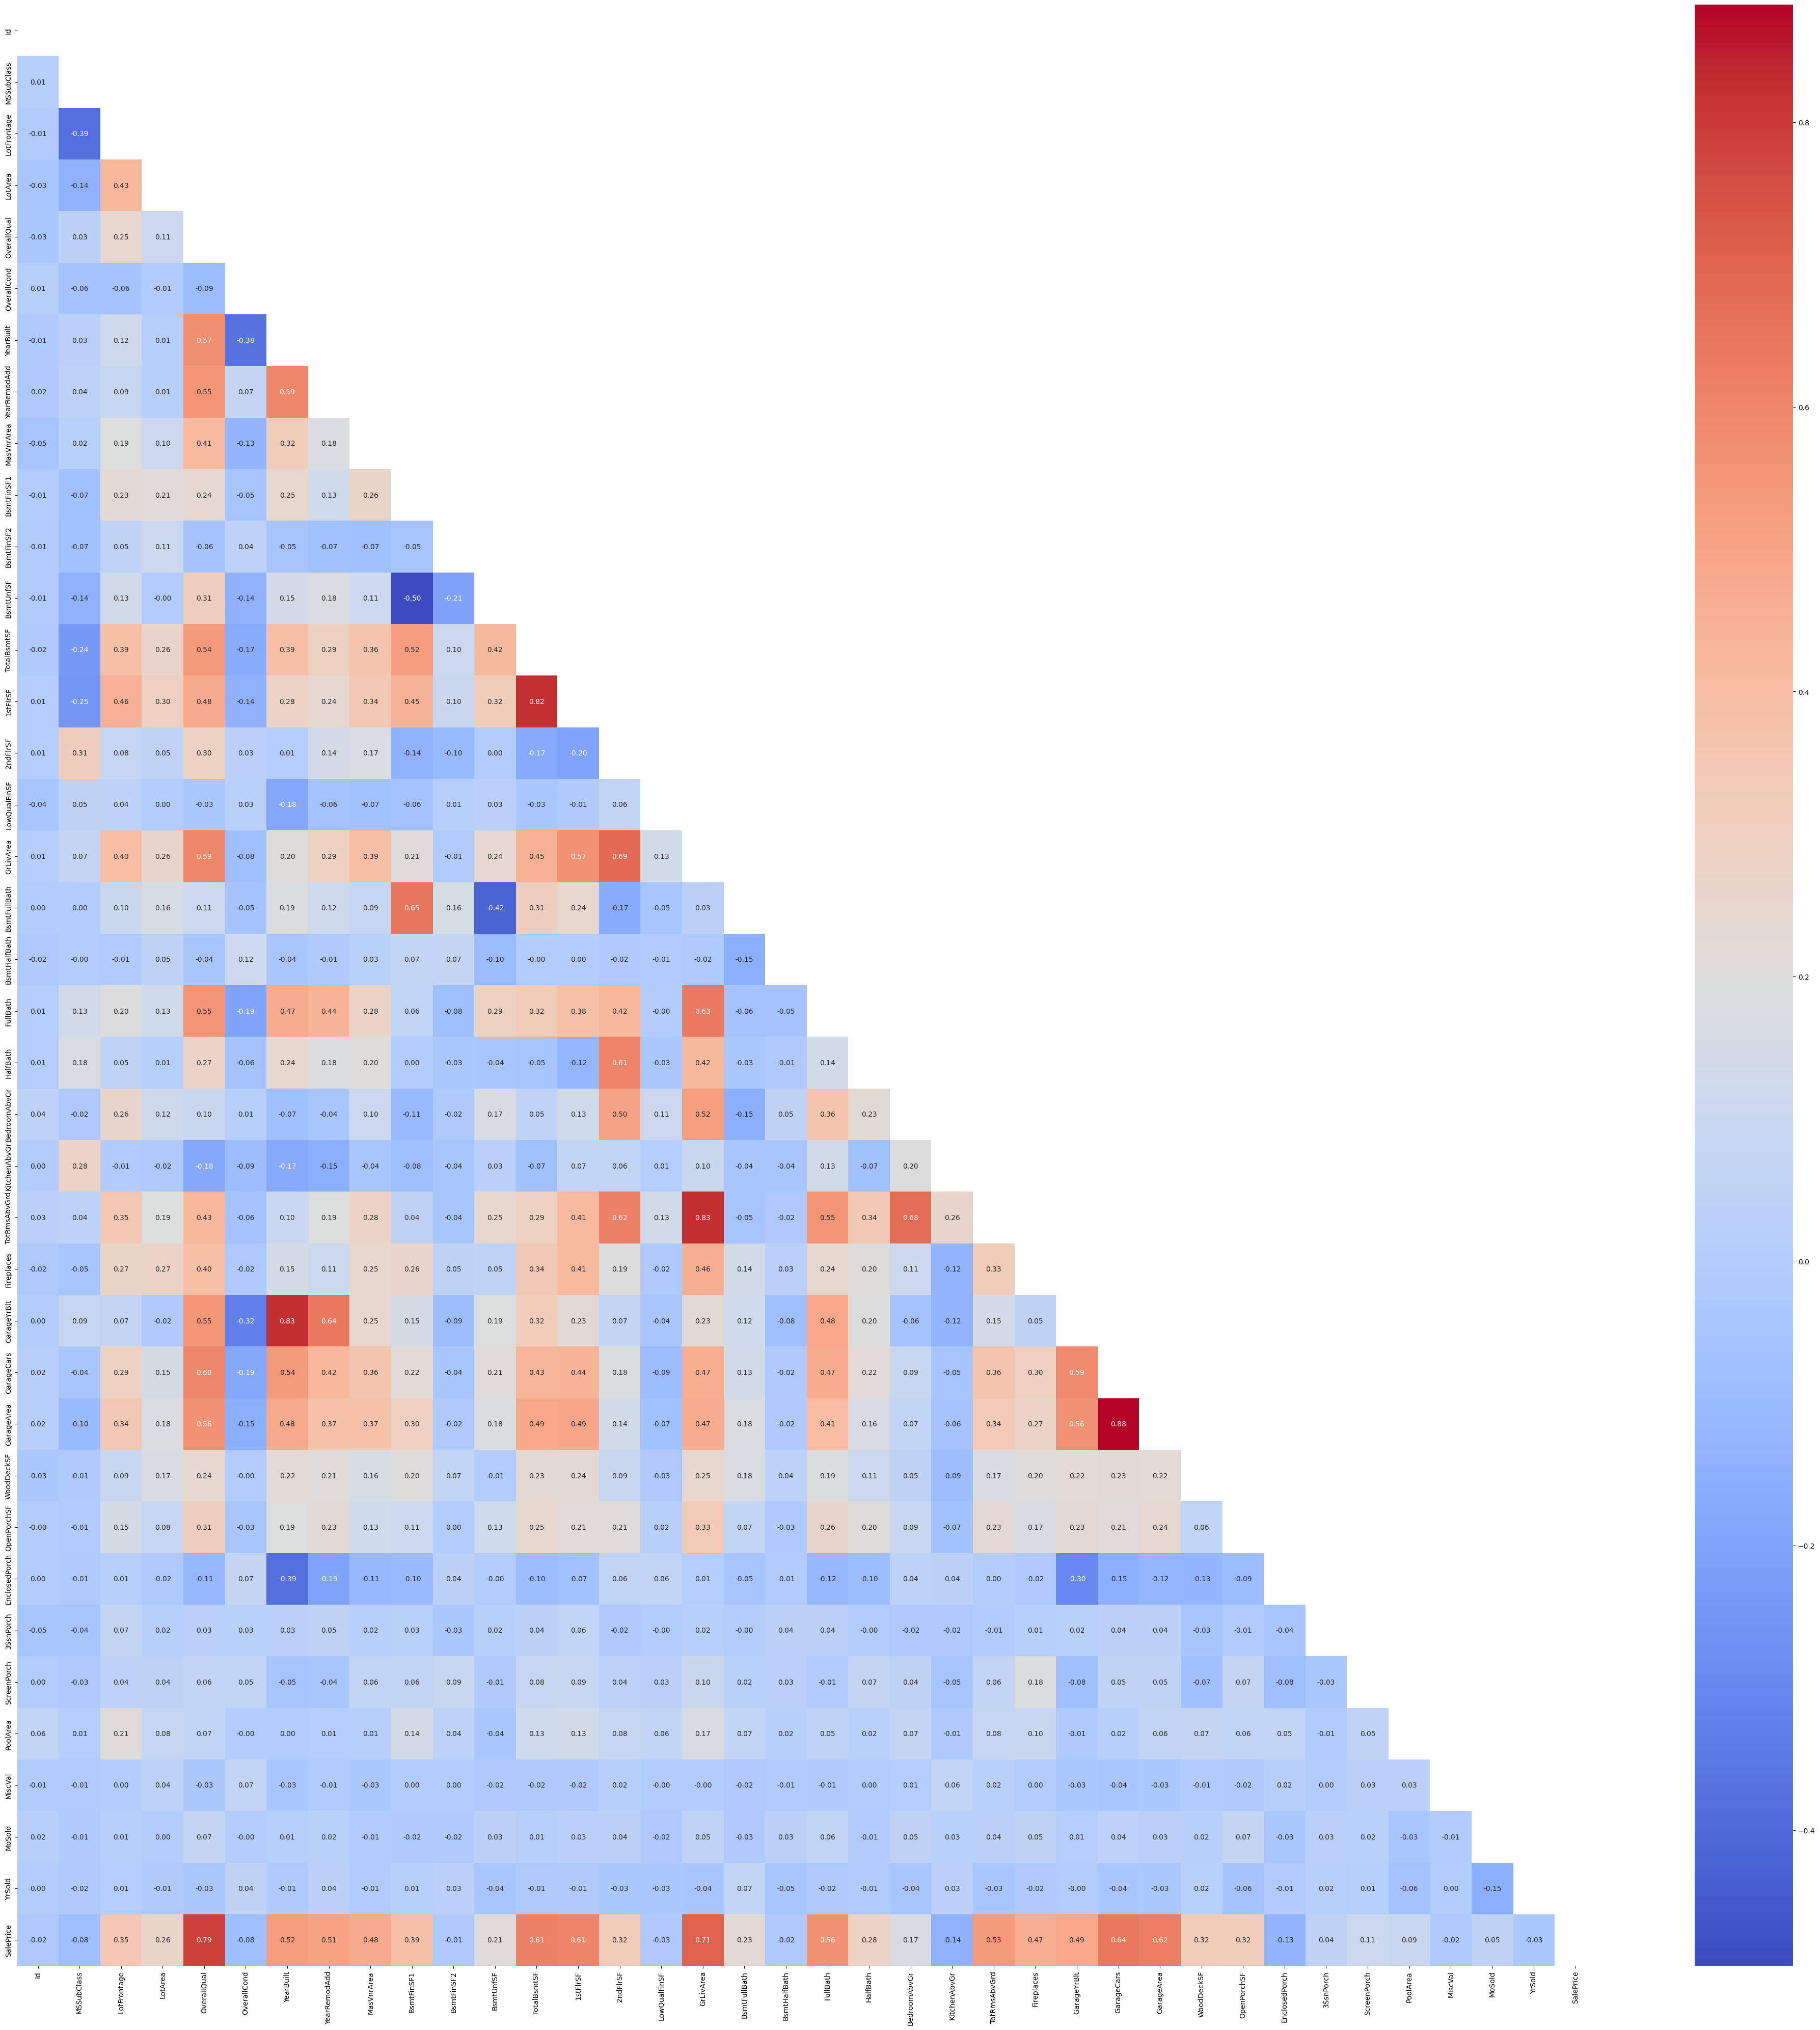

In [18]:
plt.figure(figsize = (50, 50))

corr_mat = train_df[NUM_COLS].corr()
mask = np.triu(np.ones_like(corr_mat,dtype=bool))
sns.heatmap(data=corr_mat, mask=mask, annot=True, fmt='.2f', cmap = "coolwarm")
plt.show()

In [19]:
corr_mat['SalePrice'].abs().sort_values(ascending=False)[1:16]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

In [20]:
top_corr_feature = corr_mat['SalePrice'].abs().sort_values(ascending=False)[1:16]
TOP_NUM_FEATURE = top_corr_feature.index.tolist()

top_corr_mat = train_df[TOP_NUM_FEATURE + ['SalePrice']].corr()

<Axes: >

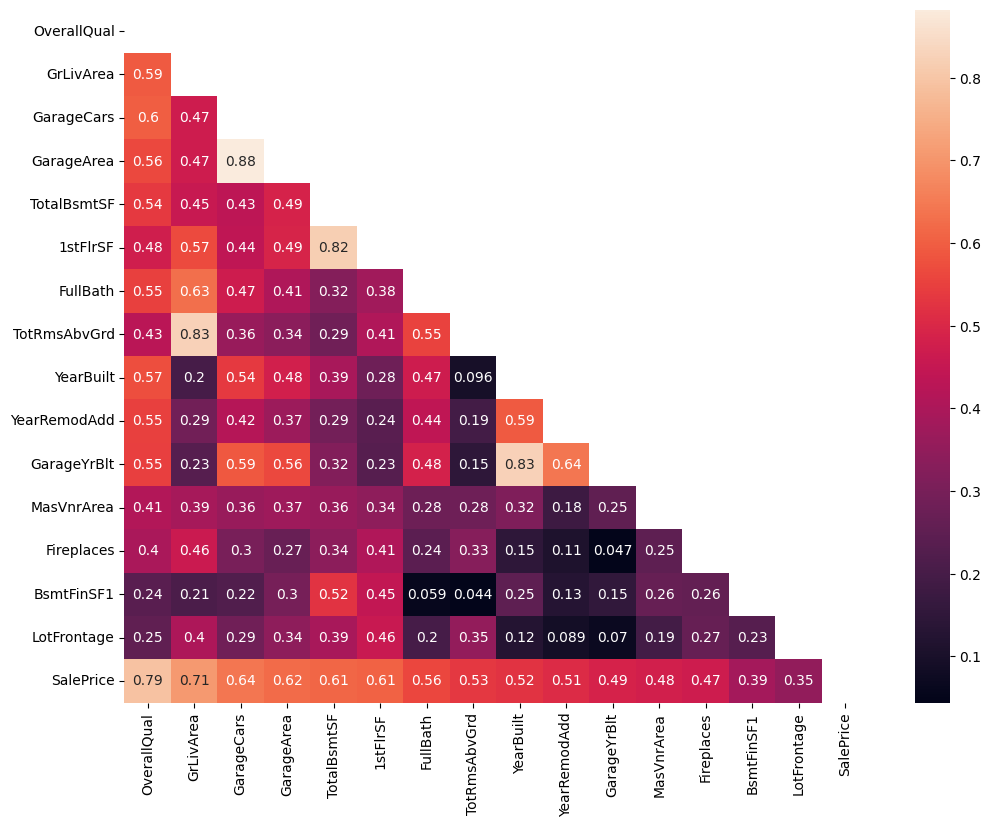

In [21]:
mask = np.triu(np.ones_like(top_corr_mat, dtype=bool))

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data=top_corr_mat, annot=True, mask=mask)

In [22]:


encodeed_data = train_df[CAT_COLS].apply(LabelEncoder().fit_transform)

f_scores, p_values = f_regression(encodeed_data, TARGET)

encoded_df = pd.DataFrame({
    "Feature": CAT_COLS,
    "F_score": f_scores,
    "p_value": p_values
}).sort_values("F_score", ascending=False)

In [23]:
TOP_CAT_FEATURE = encoded_df['Feature'].values.tolist()[:15]
TOP_CAT_FEATURE

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'GarageType',
 'HeatingQC',
 'Foundation',
 'BsmtExposure',
 'LotShape',
 'CentralAir',
 'Electrical',
 'PavedDrive',
 'RoofStyle',
 'SaleCondition',
 'Neighborhood']

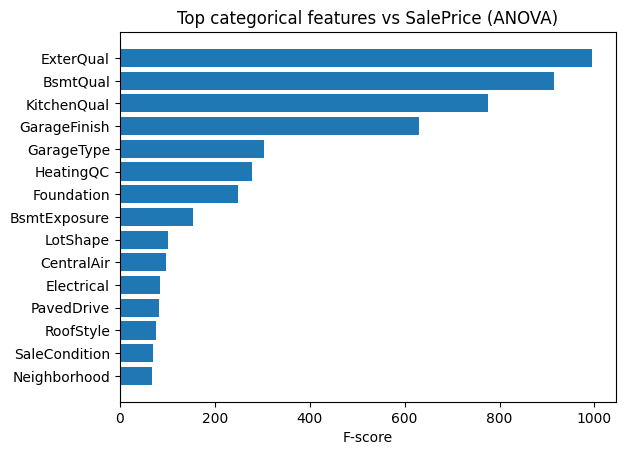

In [24]:
top = encoded_df.head(15)

plt.barh(top["Feature"], top["F_score"])
plt.gca().invert_yaxis()
plt.xlabel("F-score")
plt.title("Top categorical features vs SalePrice (ANOVA)")
plt.show()

# Feature Engg.

In [25]:
top_corr_feature

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

In [26]:
TOP_CAT_FEATURE = encoded_df['Feature'].values.tolist()[:10]

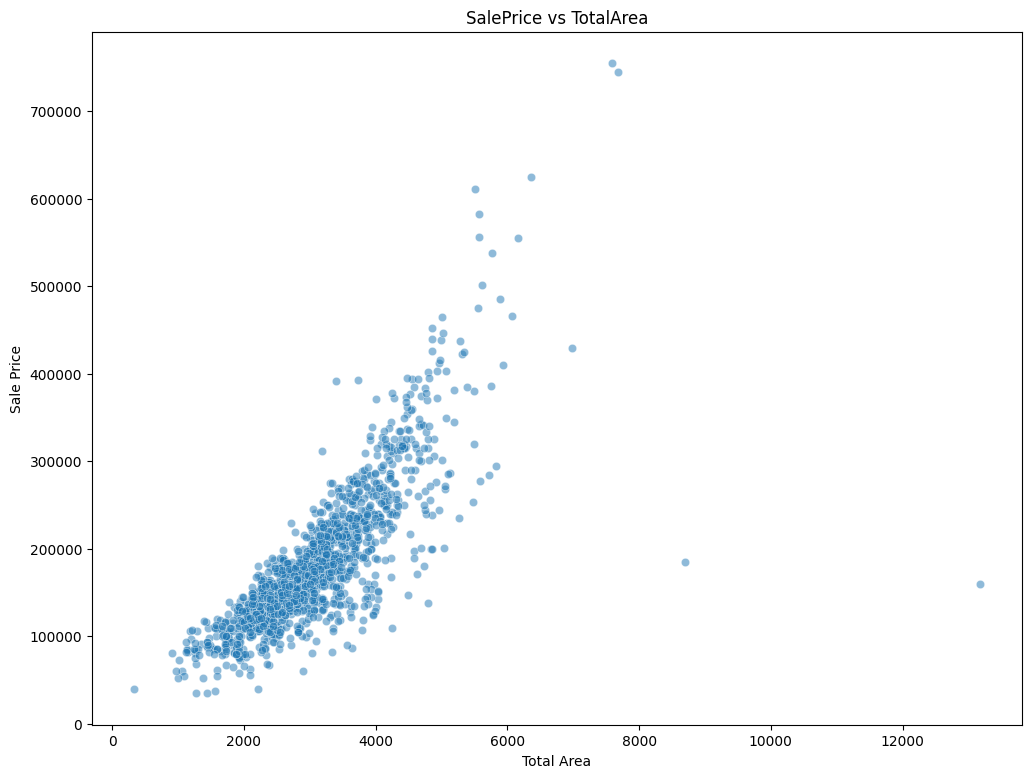

In [27]:
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['TotalBsmtSF']

area_corr = train_df[['TotalArea', 'SalePrice']].corr()

plt.figure(figsize=(12,9))
sns.scatterplot(data=train_df, x='TotalArea', y = 'SalePrice', alpha=0.5)
plt.title('SalePrice vs TotalArea')
plt.xlabel('Total Area')
plt.ylabel('Sale Price')
plt.show()

# Conclusion of EDA

1. Strong Numeriucal Feature : OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces, BsmtFinSF1, LotFrontage
2. Strong Ctaegorical Feature : BsmtQual, KitchenQual, GarageFinish, GarageType, HeatingQC, Foundation, BsmtExposure, LotShape, CentralAir, Electrical, PavedDrive, RoofStyle,  SaleCondition, Neighborhood
3. Feature Scalling is required

In [28]:
COLS_TO_REMOVE

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [29]:
print("CAT COLS : ", NUM_COLS)
print("\nCAT COLS : ",CAT_COLS)

CAT COLS :  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

CAT COLS :  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'Gar

In [30]:
print("TOP CAT FEATURE : ", len(TOP_CAT_FEATURE))
print("\nTOP NUM FEATURE : ",len(TOP_NUM_FEATURE))

TOP CAT FEATURE :  10

TOP NUM FEATURE :  15


In [31]:
FINAL_FEATURES = list(set(TOP_NUM_FEATURE + TOP_CAT_FEATURE) - set(COLS_TO_REMOVE))

In [32]:
print(len(FINAL_FEATURES))

25


In [33]:
final_train_df = train_df[FINAL_FEATURES]
final_test_df = test_df[FINAL_FEATURES]

## filling null values

In [34]:
# FEATURE_TO_USE = top_feature + TOP_CAT_FEATURE
# FEATURE_TO_USE

In [35]:
X = final_train_df
y = TARGET

In [36]:
si_num = SimpleImputer(strategy="median")
si_cat = SimpleImputer(strategy="most_frequent")

In [37]:
null_cols = X.isnull().sum()
null_cols[null_cols > 0]

LotFrontage     259
GarageType       81
GarageYrBlt      81
BsmtQual         37
MasVnrArea        8
GarageFinish     81
BsmtExposure     38
dtype: int64

In [38]:
X

,FullBath,BsmtFinSF1,OverallQual,CentralAir,LotFrontage,Foundation,Fireplaces,YearBuilt,TotRmsAbvGrd,KitchenQual,...,GarageCars,MasVnrArea,1stFlrSF,HeatingQC,GarageFinish,GarageArea,LotShape,BsmtExposure,ExterQual,TotalBsmtSF
0,2,706,7,Y,65.0,PConc,0,2003,8,Gd,...,2,196.0,856,Ex,RFn,548,Reg,No,Gd,856
1,2,978,6,Y,80.0,CBlock,1,1976,6,TA,...,2,0.0,1262,Ex,RFn,460,Reg,Gd,TA,1262
2,2,486,7,Y,68.0,PConc,1,2001,6,Gd,...,2,162.0,920,Ex,RFn,608,IR1,Mn,Gd,920
3,1,216,7,Y,60.0,BrkTil,1,1915,7,Gd,...,3,0.0,961,Gd,Unf,642,IR1,No,TA,756
4,2,655,8,Y,84.0,PConc,1,2000,9,Gd,...,3,350.0,1145,Ex,RFn,836,IR1,Av,Gd,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,6,Y,62.0,PConc,1,1999,7,TA,...,2,0.0,953,Ex,RFn,460,Reg,No,TA,953
1456,2,790,6,Y,85.0,CBlock,2,1978,7,TA,...,2,119.0,2073,TA,Unf,500,Reg,No,TA,1542
1457,2,275,7,Y,66.0,Stone,2,1941,9,Gd,...,1,0.0,1188,Ex,RFn,252,Reg,No,Ex,1152
1458,1,49,5,Y,68.0,CBlock,0,1950,5,Gd,...,1,0.0,1078,Gd,Unf,240,Reg,Mn,TA,1078


In [39]:
X[TOP_NUM_FEATURE] = si_num.fit_transform(X[TOP_NUM_FEATURE])
X[TOP_CAT_FEATURE] = si_cat.fit_transform(X[TOP_CAT_FEATURE])

/tmp/ipykernel_17/608303366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[TOP_NUM_FEATURE] = si_num.fit_transform(X[TOP_NUM_FEATURE])
/tmp/ipykernel_17/608303366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[TOP_CAT_FEATURE] = si_cat.fit_transform(X[TOP_CAT_FEATURE])


In [40]:
final_test_df[TOP_NUM_FEATURE] = si_num.transform(final_test_df[TOP_NUM_FEATURE])
final_test_df[TOP_CAT_FEATURE] = si_cat.transform(final_test_df[TOP_CAT_FEATURE])

/tmp/ipykernel_17/57314149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df[TOP_NUM_FEATURE] = si_num.transform(final_test_df[TOP_NUM_FEATURE])
/tmp/ipykernel_17/57314149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df[TOP_CAT_FEATURE] = si_cat.transform(final_test_df[TOP_CAT_FEATURE])


## Categories -> Numeric

In [41]:
oe = OrdinalEncoder()

X[TOP_CAT_FEATURE] = oe.fit_transform(X[TOP_CAT_FEATURE])
final_test_df[TOP_CAT_FEATURE] = oe.transform(final_test_df[TOP_CAT_FEATURE])

/tmp/ipykernel_17/2014855444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[TOP_CAT_FEATURE] = oe.fit_transform(X[TOP_CAT_FEATURE])
/tmp/ipykernel_17/2014855444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df[TOP_CAT_FEATURE] = oe.transform(final_test_df[TOP_CAT_FEATURE])


In [42]:
print("Train",X.select_dtypes(include='object').columns)
print("Test",final_test_df.select_dtypes(include='object').columns)

Train Index([], dtype='object')
Test Index([], dtype='object')


## Scalling the data values

In [43]:
sc = StandardScaler()

X = sc.fit_transform(X)
final_test_df = sc.transform(final_test_df)

In [44]:
X

array([[ 0.78974052,  0.57542484,  0.65147924, ...,  0.62891184,
        -0.77797579, -0.45930254],
       [ 0.78974052,  1.17199212, -0.07183611, ..., -1.12843034,
         0.66345144,  0.46646492],
       [ 0.78974052,  0.09290718,  0.65147924, ..., -0.24975925,
        -0.77797579, -0.31336875],
       ...,
       [ 0.78974052, -0.36987111,  0.65147924, ...,  0.62891184,
        -3.66083024,  0.21564122],
       [-1.02604084, -0.86554834, -0.79515147, ..., -0.24975925,
         0.66345144,  0.04690528],
       [-1.02604084,  0.84738933, -0.79515147, ...,  0.62891184,
        -0.77797579,  0.45278362]])

train test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## training the model

In [46]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)  

In [48]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

MAE 22883.24289666188
MSE 1264598656.4772277


gradint boosting

In [49]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500)

In [50]:
y_pred = gbr.predict(X_test)

In [51]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

MAE 18137.58104848871
MSE 853711915.8728757


LGBMRegressor

In [52]:
lgbmr= LGBMRegressor(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbmr.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 25
[LightGBM] [Info] Start training from score 181441.541952


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=250,
              random_state=42, subsample=0.8)

In [53]:
y_pred = lgbmr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [54]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

MAE 18722.010831300406
MSE 1042096335.9692245


In [55]:
sub_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [56]:
lr.predict(final_test_df)

array([103567.03497565, 157599.24603897, 174698.83252964, ...,
       149078.06465853, 112940.49636566, 239835.47906716])

## prediction

## submission


In [57]:
test_predict = gbr.predict(final_test_df)

In [58]:
len(test_predict)

1459

In [59]:
test_df.shape

(1459, 74)

In [60]:
final_test_df.shape

(1459, 25)

In [61]:
final_test_df

array([[-1.02604084,  0.05342846, -0.79515147, ...,  0.62891184,
         0.66345144, -0.40001694],
       [-1.02604084,  1.05136271, -0.07183611, ...,  0.62891184,
         0.66345144,  0.61923935],
       [ 0.78974052,  0.76185211, -0.79515147, ...,  0.62891184,
         0.66345144, -0.29512703],
       ...,
       [-1.02604084,  1.71153459, -0.79515147, ...,  0.62891184,
         0.66345144,  0.37981673],
       [-1.02604084, -0.23388887, -0.79515147, ..., -2.00710143,
         0.66345144, -0.33161048],
       [ 0.78974052,  0.68947446,  0.65147924, ..., -2.00710143,
         0.66345144, -0.14007238]])

In [62]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [63]:
submission = pd.DataFrame({
    "Id": test_df['Id'],
    "SalePrice": test_predict
})

In [64]:
submission.to_csv("submission.csv", index=False)